In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from datetime import timedelta
from datetime import datetime

In [4]:
dataframe = pd.read_csv('covid_19_clean_complete.csv')
dataframe.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


<AxesSubplot:>

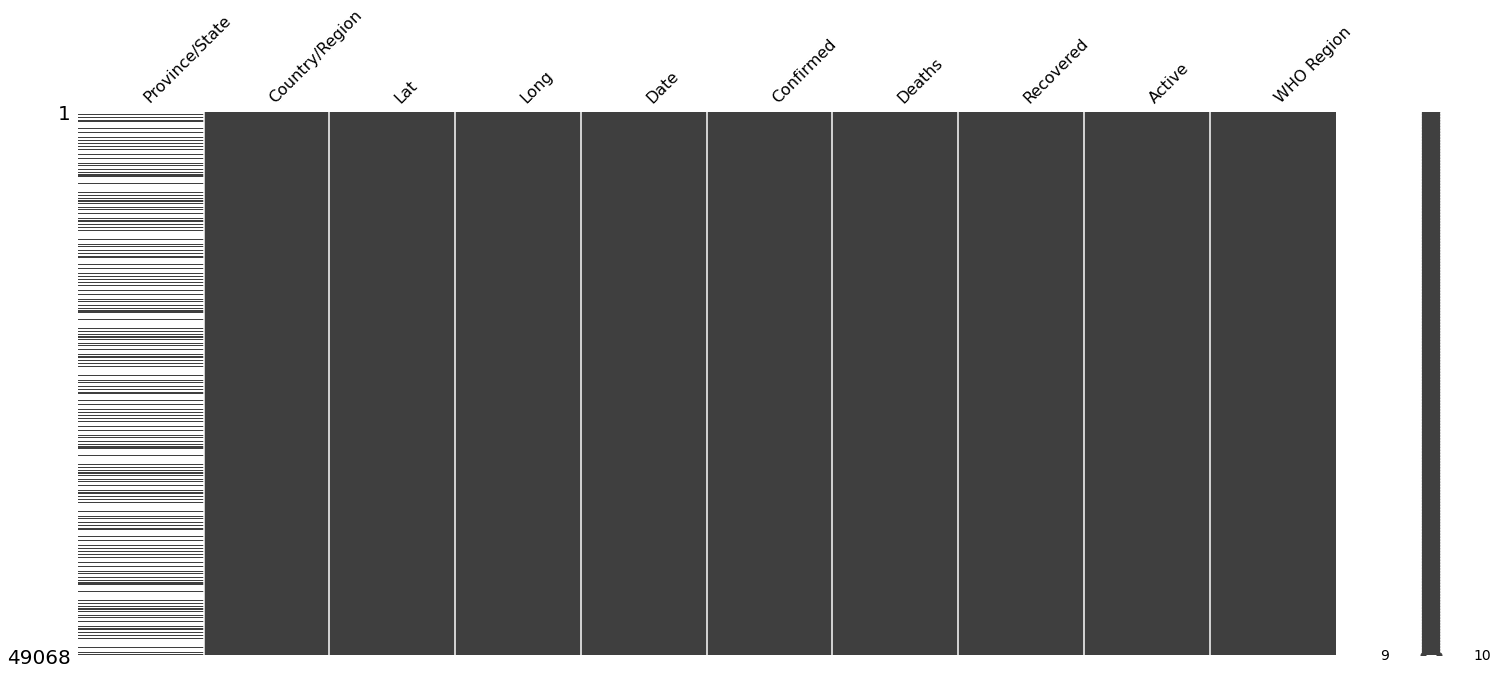

In [6]:
msno.matrix(dataframe)

In [9]:
print(f'Dataframe shape {dataframe.shape}')

Dataframe shape (49068, 10)


In [11]:
dataframe.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [13]:
dataframe.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [20]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe_hubei = dataframe[dataframe['Province/State'] == 'Hubei'].reset_index(drop=True)
dataframe_hubei['New_confirmed'] = dataframe_hubei['Confirmed'].diff()
dataframe_hubei['New_death'] = dataframe_hubei['Deaths'].diff()
dataframe_hubei['New_recovered'] = dataframe_hubei['Recovered'].diff()

In [22]:
dataframe_hubei = dataframe_hubei.drop(columns=['Active', 'WHO Region'])

In [23]:
dataframe_hubei.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,New_confirmed,New_death,New_recovered
0,Hubei,China,30.9756,112.2707,2020-01-22,444,17,28,NaN,NaN,NaN
1,Hubei,China,30.9756,112.2707,2020-01-23,444,17,28,0.0,0.0,0.0
2,Hubei,China,30.9756,112.2707,2020-01-24,549,24,31,105.0,7.0,3.0
3,Hubei,China,30.9756,112.2707,2020-01-25,761,40,32,212.0,16.0,1.0
4,Hubei,China,30.9756,112.2707,2020-01-26,1058,52,42,297.0,12.0,10.0


In [24]:
dataframe_hubei.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,New_confirmed,New_death,New_recovered
183,Hubei,China,30.9756,112.2707,2020-07-23,68135,4512,63623,0.0,0.0,0.0
184,Hubei,China,30.9756,112.2707,2020-07-24,68135,4512,63623,0.0,0.0,0.0
185,Hubei,China,30.9756,112.2707,2020-07-25,68135,4512,63623,0.0,0.0,0.0
186,Hubei,China,30.9756,112.2707,2020-07-26,68135,4512,63623,0.0,0.0,0.0
187,Hubei,China,30.9756,112.2707,2020-07-27,68135,4512,63623,0.0,0.0,0.0


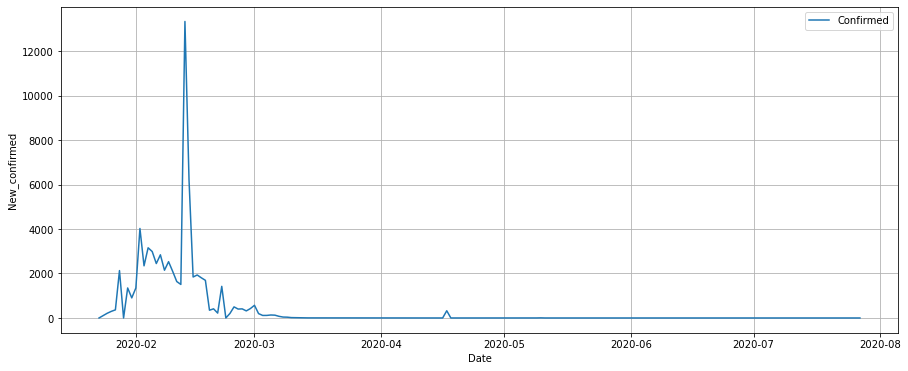

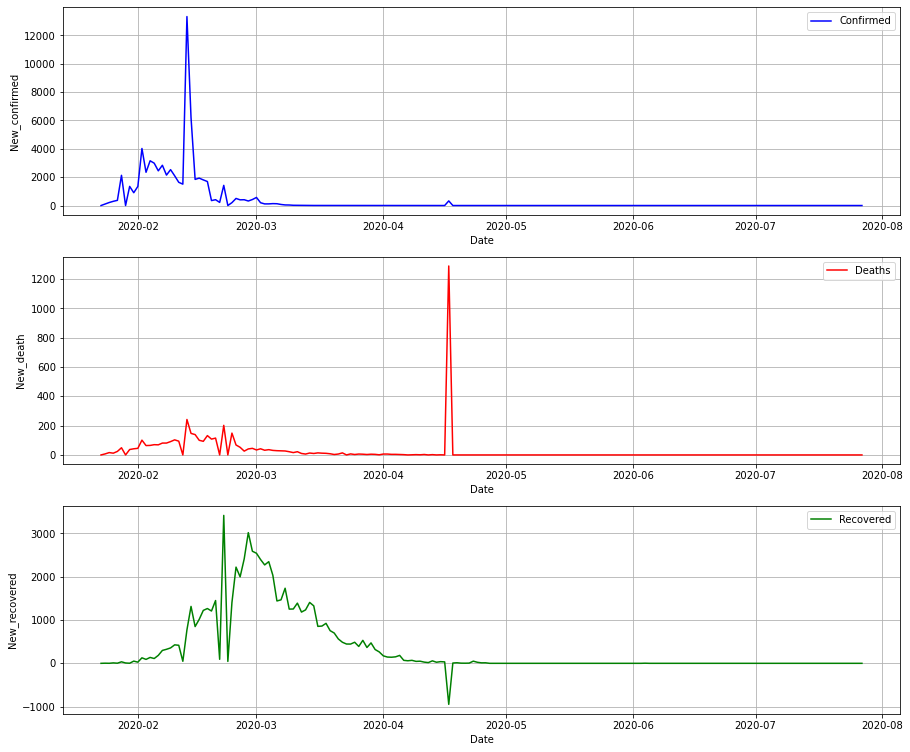

In [39]:
fig = plt.figure(figsize=(15, 13))
ax1 = fig.add_subplot(311)
sns.lineplot(x='Date', y='New_confirmed', data=dataframe_hubei, label='Confirmed', color='blue')
ax2 = fig.add_subplot(312)
sns.lineplot(x='Date', y='New_death', data=dataframe_hubei, label='Deaths', color='red')
ax3 = fig.add_subplot(313)
sns.lineplot(x='Date', y='New_recovered', data=dataframe_hubei, label='Recovered', color='green')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

In [43]:
%%time
print(dataframe_hubei['New_confirmed'].sum().round())
print(dataframe_hubei['New_death'].sum().round())
print(dataframe_hubei['New_recovered'].sum().round())

for i in range(1, len(dataframe_hubei.index)):
    new_confirmed = dataframe_hubei.iloc[i]['New_confirmed']
    new_death = dataframe_hubei.iloc[i]['New_death']
    new_recovered = dataframe_hubei.iloc[i]['New_recovered']
    
    window_size = min(i, 10)
    new_confirmed_dist = new_confirmed / window_size
    for j in range(window_size - 1):
        dataframe_hubei.loc[i-j-1, 'New_confirmed'] += new_confirmed_dist
    dataframe_hubei.loc[i, 'New_confirmed'] = new_confirmed_dist
    
    window_size = min(i, 3)
    new_death_dist = new_death / window_size
    for j in range(window_size - 1):
        dataframe_hubei.loc[i-j-1, 'New_death'] += new_death_dist
    dataframe_hubei.loc[i, 'New_death'] = new_death_dist
    
    window_size = min(i, 3)
    new_recoveries_dist = new_recovered / window_size
    for j in range(window_size - 1):
        dataframe_hubei.loc[i-j-1, 'New_recovered'] += new_recoveries_dist
    dataframe_hubei.loc[i, 'New_recovered'] = new_recoveries_dist
    
print(dataframe_hubei['New_confirmed'].sum().round())
print(dataframe_hubei['New_death'].sum().round())
print(dataframe_hubei['New_recovered'].sum().round())

67691.0
4495.0
63595.0
67691.0
4495.0
63595.0
Wall time: 3.37 s
Parser   : 143 ms


In [44]:
dte_cutoff = dataframe_hubei['Date'].max() - timedelta(days=10)
dataframe_hubei = dataframe_hubei[dataframe_hubei['Date'] <= dte_cutoff]

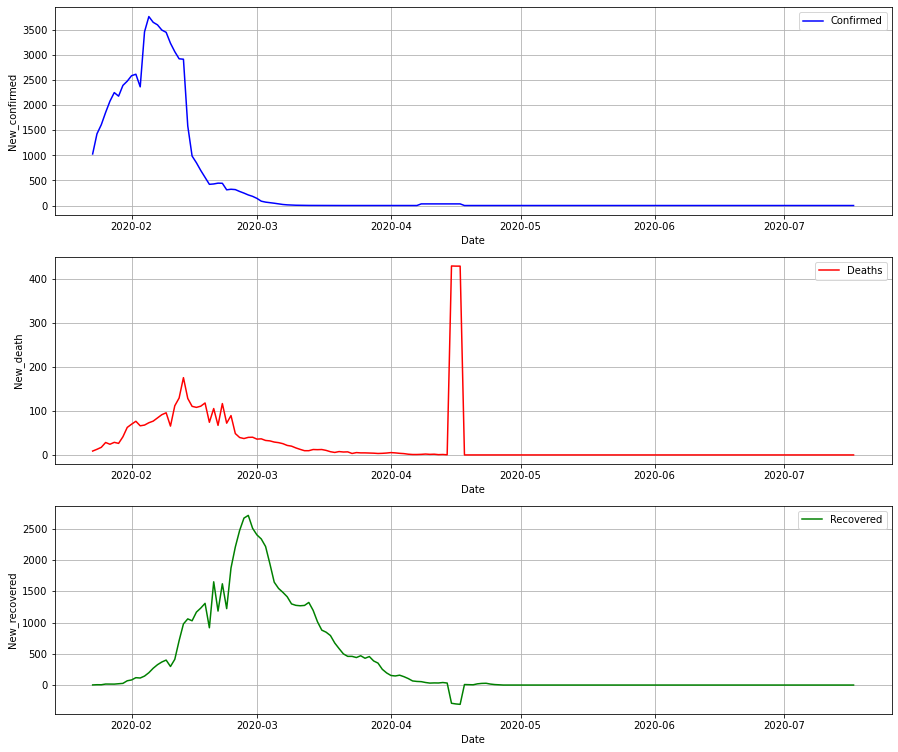

In [45]:
fig = plt.figure(figsize=(15, 13))
ax1 = fig.add_subplot(311)
sns.lineplot(x='Date', y='New_confirmed', data=dataframe_hubei, label='Confirmed', color='blue')
ax2 = fig.add_subplot(312)
sns.lineplot(x='Date', y='New_death', data=dataframe_hubei, label='Deaths', color='red')
ax3 = fig.add_subplot(313)
sns.lineplot(x='Date', y='New_recovered', data=dataframe_hubei, label='Recovered', color='green')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)